In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator

In [2]:
df = pd.read_csv("telco.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [4]:
df.isnull().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [5]:
df = df[df['MSISDN/Number'].notna()]

In [6]:
df = df[df['Bearer Id'].notna()]

In [7]:
df = df.reset_index()

In [8]:
df.head()

,index,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [9]:
num_cols = []
categorical_cols = []

In [10]:
def sort_cols(data):


    for i in data.columns:
        if data[i].dtypes == "object":
            categorical_cols.append(i)
        else :
            num_cols.append(i)

In [11]:
sort_cols(df)

In [12]:
def fix_cat_cols(data,cat_columns):
    for i in cat_columns:
        data[i] = data[i].fillna(data[i].mode()[0])

In [13]:
fix_cat_cols(df,categorical_cols)

In [14]:
def fix_num_cols(data,num_columns):
    for i in num_columns:
        data[i] = data[i].fillna(data[i].mean())

In [15]:
fix_num_cols(df,num_cols)

# Task 3

In [16]:
needed_cols = ['Avg RTT DL (ms)','Avg RTT UL (ms)','Avg Bearer TP DL (kbps)','Avg Bearer TP UL (kbps)','TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)']

In [17]:
df.isnull().sum()

index                                       0
Bearer Id                                   0
Start                                       0
Start ms                                    0
End                                         0
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)               

In [18]:
for _ in needed_cols:
    Q1 = df[_].quantile(0.25)
    Q3 = df[_].quantile(0.75)
    IQR = Q1 - Q3
    print(Q1 - 1.5 * IQR)
    print(Q3 + 1.5 * IQR)
    
    print(f'the skewness is {df[_].skew()}')
    print('_________________________________________________')

141.79991312980889
-0.5999710432696332
the skewness is 73.89081438380502
_________________________________________________
24.94234841591529
-4.314116138638429
the skewness is 31.724093951511794
_________________________________________________
29527.75
-9785.25
the skewness is 2.589861381871817
_________________________________________________
1650.5
-487.5
the skewness is 4.499000712505578
_________________________________________________
30804718.972922362
-8386921.990974121
the skewness is 24.79060792781805
_________________________________________________
1123665.7157394325
-286789.90524647746
the skewness is 140.34153032538168
_________________________________________________


In [19]:
for _ in needed_cols:
    Q1 = df[_].quantile(0.05)
    Q3 = df[_].quantile(0.95)
    IQR = Q1 - Q3
    #df[_] = np.where(df[_] < Q1 - 1.5 * IQR, df[_].mean(), df[_] )
    #df[_] = np.where(df[_] > Q3 - 1.5 * IQR, df[_].mean(), df[_] )
    df[_] = np.where(df[_] < Q1, df[_].mean(), df[_] )
    df[_] = np.where(df[_] > Q3, df[_].mean(), df[_] )
    print(df[_].skew())

0.7443364651558915
0.8871263872840707
1.5683406246562437
2.829296077083227
-0.87730823412512
-1.047936833142215


In [20]:
df['AVG RTT (ms)'] = df['Avg RTT DL (ms)'] + df['Avg RTT UL (ms)']
df['Avg Bearer TP (kbps)'] = df['Avg Bearer TP DL (kbps)'] + df['Avg Bearer TP UL (kbps)']
df['TCP Retrans. Vol (Bytes)'] = df['TCP DL Retrans. Vol (Bytes)'] + df['TCP UL Retrans. Vol (Bytes)']


In [21]:
scaler = StandardScaler()
cols_scaled = ['AVG RTT (ms)','Avg Bearer TP (kbps)','TCP Retrans. Vol (Bytes)']

In [22]:
df[cols_scaled] = scaler.fit_transform(df[cols_scaled])

In [23]:
df.describe()

,index,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),...,Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),AVG RTT (ms),Avg Bearer TP (kbps),TCP Retrans. Vol (Bytes)
count,148506.000000,1.485060e+05,148506.000000,148506.000000,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,148506.000000,148506.000000,...,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05
mean,75154.149597,1.014676e+19,499.205143,498.640196,1.050841e+05,2.082016e+14,4.190654e+10,4.850068e+13,70.464481,11.469813,...,1.100190e+07,4.220642e+08,8.289600e+06,4.211525e+08,8.262685e+06,4.111937e+07,4.546640e+08,-9.224721e-17,-7.081217e-18,4.650159e-16
std,43278.817266,2.893262e+18,288.563193,288.070129,8.107274e+04,1.524347e+10,2.450976e+12,2.243217e+13,37.578415,9.157564,...,6.357930e+06,2.440043e+08,4.781967e+06,2.431639e+08,4.768806e+06,1.127844e+07,2.441791e+08,1.000003e+00,1.000003e+00,1.000003e+00
min,0.000000,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,23.000000,1.000000,...,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06,-1.393779e+00,-6.803484e-01,-1.696241e+00
25%,37802.250000,7.349883e+18,250.000000,251.000000,5.824875e+04,2.082014e+14,3.365131e+10,3.546071e+13,37.000000,4.000000,...,5.476774e+06,2.104765e+08,4.130680e+06,2.103042e+08,4.144179e+06,3.321828e+07,2.431263e+08,-8.885624e-01,-6.763302e-01,-1.309189e+00
50%,75063.500000,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572231e+13,59.000000,9.000000,...,1.099937e+07,4.234669e+08,8.291650e+06,4.218618e+08,8.266016e+06,4.114196e+07,4.559408e+08,-2.389985e-01,-6.610487e-01,6.627895e-01
75%,112689.750000,1.304243e+19,749.000000,749.000000,1.329328e+05,2.082018e+14,3.368352e+10,8.611970e+13,106.199942,17.628232,...,1.650285e+07,6.332750e+08,1.243226e+07,6.316338e+08,1.238049e+07,4.903252e+07,6.657542e+08,1.007880e+00,3.284637e-01,6.627895e-01
max,149999.000000,1.318654e+19,999.000000,999.000000,1.859336e+06,2.082522e+14,8.823971e+14,9.900120e+13,220.000000,44.000000,...,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08,4.332007e+00,3.738066e+00,7.807571e-01


## Task 3.1


In [24]:
TCP_per_user = df.groupby('TCP Retrans. Vol (Bytes)').agg({'MSISDN/Number':'count'}).reset_index()

In [25]:
RTT_per_user = df.groupby('AVG RTT (ms)').agg({'MSISDN/Number':'count'}).reset_index()

In [26]:
Handset_per_user = df.groupby('Handset Type').agg({'MSISDN/Number':'count'}).reset_index()

In [27]:
TP_per_user = df.groupby('Avg Bearer TP (kbps)').agg({'MSISDN/Number':'count'}).reset_index()

In [28]:
TCP_per_user

,TCP Retrans. Vol (Bytes),MSISDN/Number
0,-1.696241,1
1,-1.696219,1
2,-1.696216,1
3,-1.696190,1
4,-1.696187,1
...,...,...
52459,0.776143,1
52460,0.776488,1
52461,0.776564,1
52462,0.776585,5739


In [29]:
RTT_per_user

,AVG RTT (ms),MSISDN/Number
0,-1.393779,289
1,-1.369721,463
2,-1.345663,570
3,-1.321605,975
4,-1.297547,1958
...,...,...
629,4.235775,4
630,4.259833,2
631,4.283891,1
632,4.307949,1


In [30]:
Handset_per_user

,Handset Type,MSISDN/Number
0,A-Link Telecom I. Cubot A5,1
1,A-Link Telecom I. Cubot Note Plus,1
2,A-Link Telecom I. Cubot Note S,1
3,A-Link Telecom I. Cubot Nova,1
4,A-Link Telecom I. Cubot Power,1
...,...,...
1386,Zte Zte Blade C2 Smartphone Android By Sfr Sta...,2
1387,Zyxel Communicat. Lte7460,1
1388,Zyxel Communicat. Sbg3600,1
1389,Zyxel Communicat. Zyxel Wah7706,1


In [31]:
TP_per_user

,Avg Bearer TP (kbps),MSISDN/Number
0,-0.680348,3
1,-0.680288,2
2,-0.680227,86
3,-0.680166,4
4,-0.680105,9
...,...,...
41847,3.721080,1
41848,3.723576,1
41849,3.726742,1
41850,3.729360,1


## Task 3.2

In [32]:
new_needed_cols = ['AVG RTT (ms)','Avg Bearer TP (kbps)','TCP Retrans. Vol (Bytes)']

In [33]:
for i in new_needed_cols:
    print(f'For col {i}')
    print(df[i].sort_values()[:10])
    print(df[i].sort_values()[-10:])
    print(df[i].value_counts().nlargest(10))
    print('_____________________________________________________')

For col AVG RTT (ms)
72742    -1.393779
104003   -1.393779
55040    -1.393779
54024    -1.393779
10228    -1.393779
50592    -1.393779
33019    -1.393779
65390    -1.393779
69279    -1.393779
65407    -1.393779
Name: AVG RTT (ms), dtype: float64
759       4.187660
116615    4.235775
116481    4.235775
120839    4.235775
67514     4.235775
139774    4.259833
119070    4.259833
147287    4.283891
136474    4.307949
37825     4.332007
Name: AVG RTT (ms), dtype: float64
 1.007880    28363
-1.273489     4535
-1.032910     4064
-1.056968     2583
-1.008852     2563
-1.249431     2349
-0.792331     2149
-1.297547     1958
 0.607839     1903
-0.984794     1889
Name: AVG RTT (ms), dtype: int64
_____________________________________________________
For col Avg Bearer TP (kbps)
94174    -0.680348
14333    -0.680348
97036    -0.680348
26505    -0.680288
17192    -0.680288
50892    -0.680227
102466   -0.680227
13145    -0.680227
50636    -0.680227
127639   -0.680227
Name: Avg Bearer TP (kbps), dtype

## Task 3.3

In [34]:
df['AVG_TP_per_Handset'] = df.groupby("Avg Bearer TP (kbps)")["Handset Type"].transform('count')

<AxesSubplot:xlabel='AVG_TP_per_Handset', ylabel='Density'>

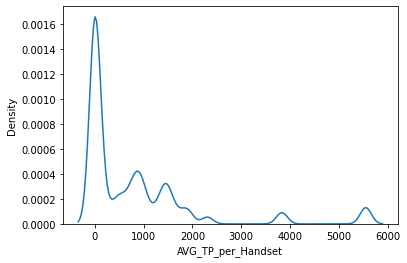

In [35]:
sns.kdeplot(data = df, x = 'AVG_TP_per_Handset')

In [36]:
AVG_TCP_RTN_per_Handset = df.groupby("Handset Type").agg({"TCP Retrans. Vol (Bytes)":"sum"})

<AxesSubplot:xlabel='TCP Retrans. Vol (Bytes)', ylabel='Density'>

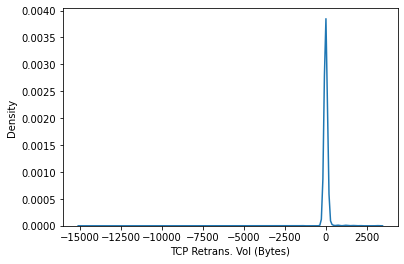

In [37]:
sns.kdeplot(data = AVG_TCP_RTN_per_Handset, x = "TCP Retrans. Vol (Bytes)")

## Task 3.4

In [38]:
kmeans = KMeans(
    init= "random",
    n_clusters = 3,
    n_init= 10,
    max_iter= 300,
    random_state= 42
)

In [39]:
X = df[['AVG RTT (ms)','Avg Bearer TP (kbps)','TCP Retrans. Vol (Bytes)']]

In [40]:
kmeans.fit(X)

KMeans(init='random', n_clusters=3, random_state=42)

In [41]:
X['labels'] = kmeans.labels_

C:\Users\CLASSISH\AppData\Local\Temp/ipykernel_2000/3168574615.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['labels'] = kmeans.labels_


In [42]:
X['labels'].value_counts()

0    57083
2    46761
1    44662
Name: labels, dtype: int64

In [43]:
X1 = X[X.labels==1]

In [44]:
X1.describe()

,AVG RTT (ms),Avg Bearer TP (kbps),TCP Retrans. Vol (Bytes),labels
count,44662.000000,44662.000000,44662.000000,44662.0
mean,1.050474,-0.381149,0.579694,1.0
std,0.528864,0.569107,0.394805,0.0
min,-0.046535,-0.680348,-1.696080,1.0
25%,1.007880,-0.676574,0.662790,1.0
50%,1.007880,-0.675295,0.662790,1.0
75%,1.007880,-0.327855,0.662790,1.0
max,4.332007,3.471158,0.780757,1.0


In [45]:
X0 = X[X.labels==0]

In [46]:
X0.describe()

,AVG RTT (ms),Avg Bearer TP (kbps),TCP Retrans. Vol (Bytes),labels
count,57083.000000,57083.000000,57083.000000,57083.0
mean,-0.868121,-0.538215,0.663358,0.0
std,0.354926,0.374851,0.108421,0.0
min,-1.393779,-0.680348,-1.385780,0.0
25%,-1.153200,-0.676878,0.662790,0.0
50%,-0.960736,-0.675965,0.662790,0.0
75%,-0.632869,-0.665189,0.662790,0.0
max,0.100649,2.149889,0.780757,0.0


In [47]:
X2 = X[X.labels==2]

In [48]:
X2.describe()

,AVG RTT (ms),Avg Bearer TP (kbps),TCP Retrans. Vol (Bytes),labels
count,46761.000000,46761.000000,46761.000000,46761.0
mean,0.056430,1.021060,-1.363460,2.0
std,0.881939,1.077068,0.543574,0.0
min,-1.393779,-0.678705,-1.696241,2.0
25%,-0.647983,0.248927,-1.644388,2.0
50%,-0.094651,0.851695,-1.591837,2.0
75%,0.734447,1.871048,-1.354115,2.0
max,4.163602,3.738066,0.780757,2.0
